# Continuação de strings e suas funções e métodos

Existem funções prontas que nos ajudam a trabalhar com strings

- Maiúscula e minúscula (capitalização das letras)

In [2]:
frase = "QuErO mOsTrAr UMA frase"

print(frase)

QuErO mOsTrAr UMA frase


In [3]:
# todas as letras maiúsculas

maiuscula = frase.upper() # método que transforma a string em letra maiúcula

print(maiuscula)

QUERO MOSTRAR UMA FRASE


In [4]:
# quero a frase toda com letras minúsculas

minuscula = frase.lower()

minuscula

'quero mostrar uma frase'

In [5]:
# quero colocar apenas a primeira maiúscula e o resto da frase em minúscula

frase.capitalize()

'Quero mostrar uma frase'

In [6]:
# quero maiúscula a primeira letra de cada palavra

frase.title()

'Quero Mostrar Uma Frase'

In [7]:
# um exemplo onde fica fácil usar essas funções

usuario = input('Digite "sim" se aceita os termos de uso: ')

if (usuario.upper() == 'SIM') or (usuario.upper() == 'S') : #evitar ter que comparar SIM, sim, Sim, SIm, siM
    print('Seja bem vindo!')
else:
    print('Que pena')

Digite "sim" se aceita os termos de uso: s
Seja bem vindo!


## Quebrando uma string

In [8]:
texto = "um texto qualquer aqui, por exemplo"

palavras = texto.split() #quebra o texto em palavras - separando as palavras por vírgula em uma LISTA
print(palavras)

['um', 'texto', 'qualquer', 'aqui,', 'por', 'exemplo']


In [11]:
for item in texto:
    print(item)

u
m
 
t
e
x
t
o
 
q
u
a
l
q
u
e
r
 
a
q
u
i
,
 
p
o
r
 
e
x
e
m
p
l
o


In [13]:
for item in palavras:
    print(item)

um
texto
qualquer
aqui,
por
exemplo


In [14]:
# quero saparar por vírgula

texto2 = texto.split(',')
texto2

['um texto qualquer aqui', ' por exemplo']

In [15]:
for item in texto2:
    print(item)

um texto qualquer aqui
 por exemplo


In [18]:
# pegando o primeiro elemento da string texto2 e separar por espaço

texto2[0].split()

['um', 'texto', 'qualquer', 'aqui']

In [20]:
# bonus

email = 'renata.marchese@ada.tech'

email.split('@')[1] # é o domínio do email

'ada.tech'

# VIAJANDO DENTRO DA AULA 

In [21]:
# vou gerar dados falsos a partir de uma biblioteca

!pip install br-nome-gen # uso para instalar uma biblioteca

  Using cached br-nome-gen-1.3.0.tar.gz (7.0 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for br-nome-gen: filename=br_nome_gen-1.3.0-py3-none-any.whl size=7200 sha256=3cc2c24faf03105046d34fb0996d57011c23d691334099851456c339ff7229b8
  Stored in directory: c:\users\rmm\appdata\local\pip\cache\wheels\48\7f\3e\82164d5b0eba43eb449fb3bfda93765467ed9a5f7e200e2fb9
Successfully built br-nome-gen


In [22]:
from br_nome_gen import pessoa_random # importanto uma biblioteca para usar

lst_nome = []
lst_masc = []
for i in range(0, 1000):
    p = pessoa_random()
    lst_nome.append(p.nome)
    lst_masc.append(p.masc)

In [24]:
!pip install Faker

     ---------------------------------------- 1.7/1.7 MB 1.4 MB/s eta 0:00:00


In [25]:
from faker import Faker
fake = Faker()

lst_email = []
for _ in range(1000):
    lst_email.append(fake.ascii_free_email())

In [26]:
import pandas as pd #dados tabulares

df = pd.DataFrame.from_dict({'nome':lst_nome, 'sexo':lst_masc, 'email':lst_email})

In [27]:
df

,nome,sexo,email
0,Ediane de Santana Plitha Chiba,False,cjohnson@gmail.com
1,José Zute,True,michael37@hotmail.com
2,Albina Arlete Naeson Estrada da Luz,False,yball@gmail.com
3,Bruna Tábata Jimi,False,brownxavier@gmail.com
4,Sílvia Gigi de Freitas,False,patrickdavidson@yahoo.com
...,...,...,...
995,Tatiane Verônica Asym,False,piercewesley@yahoo.com
996,Quésia de Braga dos Santos,False,kathleenmcbride@gmail.com
997,Jeferson da Nóbrega,True,kevin74@yahoo.com
998,Graziele Cibele Aguasivic Eichaz Tristão,False,monicacopeland@gmail.com


In [30]:
df['email'].str.split('@', expand=True)[1] # seleciono a coluna email

0        gmail.com
1      hotmail.com
2        gmail.com
3        gmail.com
4        yahoo.com
          ...     
995      yahoo.com
996      gmail.com
997      yahoo.com
998      gmail.com
999      yahoo.com
Name: 1, Length: 1000, dtype: object

In [31]:
df['email'].str.split('@', expand=True)[1].value_counts()

hotmail.com    351
yahoo.com      345
gmail.com      304
Name: 1, dtype: int64

In [32]:
!pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 1.8 MB/s eta 0:00:00


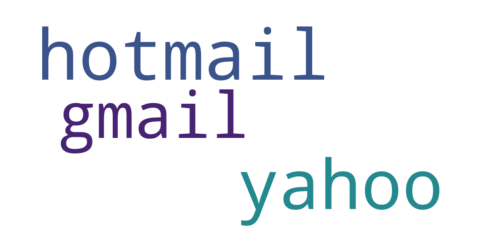

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join(df['email'].str.split('@', expand=True)[1].tolist())
wordcloud = WordCloud(max_font_size=60, background_color="white", scale=3, random_state=1).generate(text)
plt.figure(1, figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [38]:
df['nome'].str.split(expand=True)[0]

0        Ediane
1          José
2        Albina
3         Bruna
4        Sílvia
         ...   
995     Tatiane
996      Quésia
997    Jeferson
998    Graziele
999      Isabel
Name: 0, Length: 1000, dtype: object

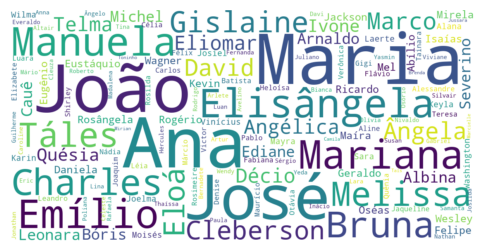

In [39]:
text = ' '.join(df['nome'].str.split(expand=True)[0].tolist())
wordcloud = WordCloud(max_font_size=60, background_color="white", scale=3, random_state=1).generate(text)
plt.figure(1, figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Voltando para a Terra, ops aula

In [44]:
# Podemos usar vários métodos na mesma linha, na sequência

frase.lower().split()[-1]

print('Frase: ',frase)
print('frase.lower(): ', frase.lower())
print('frase.lower().split(): ', frase.lower().split())
print('frase.lower().split()[-1]: ', frase.lower().split()[-1])


Frase:  QuErO mOsTrAr UMA frase
frase.lower():  quero mostrar uma frase
frase.lower().split():  ['quero', 'mostrar', 'uma', 'frase']
frase.lower().split()[-1]:  frase


In [47]:
sorted(frase.lower().split())

['frase', 'mostrar', 'quero', 'uma']

In [50]:
# Separa em dia, mês e ano

'16/10/2023'
'16/10/2022'
'17/10/2023'
'15/10/2023'

"2023/10/16"
"2022/10/16"
"2023/10/17"
"2023/10/15"

"16-10-23"

data = "16/10/2023" 

lista_data = data.split('/')
lista_data

['16', '10', '2023']

In [53]:
dia = int(lista_data[0])
mes = int(lista_data[1])
ano = int(lista_data[2])

print('Dia: ', dia)

print('Mês: ', mes)

print('Ano: ', ano)

Dia:  16
Mês:  10
Ano:  2023


In [58]:
# voltar para a data original (string)

str(dia) + '/' + str(mes) + '/' + str(ano)

'16/10/2023'

In [60]:
# substituir "10" por outubro

data_nova = data.replace("10","Outubro")
data_nova

'16/Outubro/2023'

In [61]:
data_nova.replace("/",".") # não altera a variável

'16.Outubro.2023'

In [70]:
# '16/Outubro/23'

data_nova.replace("20","") # "apagando" a string 20 

'16/Outubro/23'

```python
str.replace(old, new[, count])

Return a copy of the string with all occurrences of substring old replaced by new. If the optional argument count is given, only the first count occurrences are replaced

```

In [77]:
data_nova.replace("2", "", 1) # substituir o valor 2 na primeira ocorrência

'16/Outubro/023'

In [80]:
data_nova.replace("2", "", 1) # substituir o valor 2 até a 2a ocorrência

'16/Outubro/023'

In [83]:
print(frase)


# transformar uma string em lista

print(list(frase))

QuErO mOsTrAr UMA frase
['Q', 'u', 'E', 'r', 'O', ' ', 'm', 'O', 's', 'T', 'r', 'A', 'r', ' ', 'U', 'M', 'A', ' ', 'f', 'r', 'a', 's', 'e']


In [84]:
# transformar uma lista em string (juntando todas as letras)
lista = ['a', 'b', 'c']

str(lista) # não funciona

"['a', 'b', 'c']"

In [85]:
# transformar uma lista em string (juntando todas as letras)
lista = ['a', 'b', 'c']

''.join(lista) # unir os elementos da lista pelo caracter vazio ('') todas as letras, ou melhor, todos os elementos

'abc'

In [86]:
'-'.join(lista)

'a-b-c'

In [87]:
lista_data

['16', '10', '2023']

In [88]:
"/".join(lista_data)

'16/10/2023'

In [89]:
'texto'.join(['1','2']) # o join é método de string

'1texto2'

In [90]:
lista = ['a', 'b', 'c'] # é uma lista
separador = '123' # é uma string

separador.join(lista) # contrário de split ---> transforma lista em uma string

'a123b123c'

O join não funciona apenas com lista mas sim com qualquer objeto iterável

```python

str.join(iterable)

Return a string which is the concatenation of the strings in iterable. A TypeError will be raised if there are any non-string values in iterable, including bytes objects. The separator between elements is the string providing this method.
```

In [91]:
# revendo

f'{dia}/{mes}/{ano}'

'16/10/2023'

In [92]:
dia = 1

In [94]:
# dia: zfill ---> string

str(dia).zfill(2)

'01'

In [96]:
str(16).zfill(5)

'00016'

In [101]:
# outra forma de resolver
data = '{:02d}/{:02d}/{:04d}'.format(dia, mes, ano)
print(data)

# : passaremos opçoes
# d nº inteiro em base decimal (0 a 9)
# 2 e 4 casas
# 0 se faltar dígito, completa com zero

01/10/2023


O format possui tantas opções diferentes que existe um site inteiro dedicado a explicar e dar exemplos: https://pyformat.info/

In [102]:
import datetime

datetime.datetime.now()

datetime.datetime(2023, 10, 16, 21, 56, 36, 603421)